In [0]:
# ● Understand the basic Image Classification pipeline and the data-driven
# approach (train/predict stages)
# ● Data fetching and understand the train/val/test splits.
# ● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5
# points)
# ● Print the classification metric report (2.5 points)
# ● Implement and apply a deep neural network classifier including (feedforward
# neural network, RELU activations) (5 points)
# ● Understand and be able to implement (vectorized) backpropagation (cost
# stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
# ● Implement batch normalization for training the neural network (2.5 points
# ● Understand the differences and trade-offs between traditional and NN
# classifiers with the help of classification metrics (5 points)

In [0]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import h5py

In [0]:
# ● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
# ● Data fetching and understand the train/val/test splits.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [37]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Data/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [6]:
X_train.shape

(42000, 32, 32)

In [7]:
y_train.shape

(42000,)

In [8]:
print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))
print("testing data points: {}".format(len(y_test)))

training data points: 42000
validation data points: 60000
testing data points: 18000


In [0]:
# Reshape the data from 32x32 to 1024 to match input dimensions 
X_train = X_train.reshape(X_train.shape[0],  1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
X_val = X_val.reshape(X_val.shape[0], 1024)

6


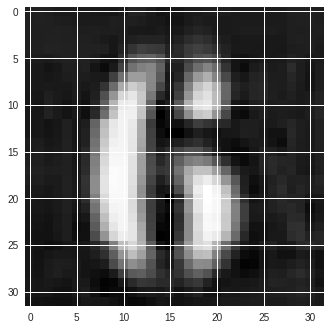

In [17]:
# Check images and labels for their correctness
print(y_train[1000])
plt.imshow(X_train[1000].reshape(32,32))

In [0]:
# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5points)

In [22]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
          model.fit(X_train, y_train)
         
          # evaluate the model and update the accuracies list
          score = model.score(X_val, y_val)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          
 # find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))
          

k=1, accuracy=83.78%
k=3, accuracy=62.83%
k=5, accuracy=62.41%
k=7, accuracy=61.43%
k=9, accuracy=60.59%
k=11, accuracy=60.32%
k=13, accuracy=59.88%
k=15, accuracy=59.45%
k=17, accuracy=59.26%
k=19, accuracy=59.10%
k=21, accuracy=58.77%
k=23, accuracy=58.62%
k=25, accuracy=58.41%
k=27, accuracy=58.21%
k=29, accuracy=58.18%
k=1 achieved highest accuracy of 83.78% on validation data


Computing the distance to only a single neighbor is substantially more efficient , thus we use K=1 to train and evaluate our classifier on the final testing data:

In [28]:

# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=1,algorithm='brute')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions[1])

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

   micro avg       0.46      0.46      0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000

Confusion matrix
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82  

In [25]:
# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=9,algorithm='brute')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions[1])

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.43      0.68      0.52      1814
           1       0.46      0.73      0.56      1828
           2       0.57      0.55      0.56      1803
           3       0.42      0.41      0.42      1719
           4       0.64      0.63      0.64      1812
           5       0.49      0.38      0.43      1768
           6       0.49      0.40      0.44      1832
           7       0.73      0.60      0.66      1808
           8       0.45      0.34      0.39      1812
           9       0.56      0.39      0.46      1804

   micro avg       0.51      0.51      0.51     18000
   macro avg       0.52      0.51      0.51     18000
weighted avg       0.52      0.51      0.51     18000

Confusion matrix
[[1226   59   44   41   52   48  108   28   98  110]
 [  91 1336   69   88   85   41   22   47   20   29]
 [ 106  242  985  125   52   36   30  126   44   57]
 [ 130  271  150  711   56  155   46  

In [0]:
# Print the classification metric report (2.5 points)

In [29]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

   micro avg       0.46      0.46      0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000



In [0]:
import pandas 

import glob

import matplotlib.pylab as plt
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

In [0]:
import tensorflow as tf
tf.set_random_seed(42)
import keras

In [0]:
#Change train and test labels into one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val,num_classes=10)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))


In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))


In [0]:
# Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

In [44]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 10s 240us/sample - loss: 14.5074 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
42000/42000 [==============================] - 9s 218us/sample - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
42000/42000 [==============================] - 9s 218us/sample - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
42000/42000 [==============================] - 9s 219us/sample - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
42000/42000 [==============================] - 9s 218us/sample - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
42000/42000 [==============================] - 9s 218us/sample - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
42000/42000 [=========================

In [45]:
print('Evaluation')
loss, acc = model.evaluate(X_test, y_test,
                           batch_size=32)
print('Test loss / test accuracy = {:.4f} / {:.4f}'.format(loss, acc))

Evaluation
18000/18000 [==============================] - 1s 72us/sample - loss: 14.5027 - acc: 0.1002
Test loss / test accuracy = 14.5027 / 0.1002


In [0]:
# Implement batch normalization for training the neural network (2.5 points)

In [46]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=32)


Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 253us/sample - loss: 1.6658 - acc: 0.4519 - val_loss: 1.1441 - val_acc: 0.6561
Epoch 2/10
42000/42000 [==============================] - 10s 240us/sample - loss: 1.1038 - acc: 0.6588 - val_loss: 0.9124 - val_acc: 0.7226
Epoch 3/10
42000/42000 [==============================] - 10s 240us/sample - loss: 0.9389 - acc: 0.7114 - val_loss: 0.7733 - val_acc: 0.7731
Epoch 4/10
42000/42000 [==============================] - 10s 240us/sample - loss: 0.8390 - acc: 0.7418 - val_loss: 0.7338 - val_acc: 0.7813
Epoch 5/10
42000/42000 [==============================] - 10s 241us/sample - loss: 0.7760 - acc: 0.7611 - val_loss: 0.7174 - val_acc: 0.7831
Epoch 6/10
42000/42000 [==============================] - 10s 241us/sample - loss: 0.7263 - acc: 0.7762 - val_loss: 0.6518 - val_acc: 0.8038
Epoch 7/10
42000/42000 [==============================] - 10s 240us/sample - loss: 0.6904 - acc: 0.7880 

In [47]:
print('Evaluation')
loss, acc = model.evaluate(X_test, y_test,
                           batch_size=32)
print('Test loss / test accuracy = {:.4f} / {:.4f}'.format(loss, acc))

Evaluation
18000/18000 [==============================] - 1s 75us/sample - loss: 0.6056 - acc: 0.8290
Test loss / test accuracy = 0.6056 / 0.8290


Text(91.68, 0.5, 'true label')

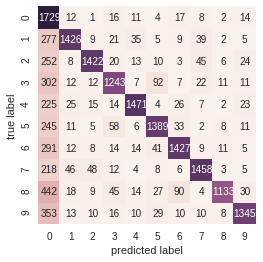

In [50]:
import seaborn as sns
# Predicting the Test set results & Printing the confusion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

#print(cm)

fig2=plt.figure()
fig2.add_subplot(111)
sns.heatmap(cm,annot=True,square=True,cbar=False,fmt="d")
plt.xlabel("predicted label")
plt.ylabel("true label")

In [0]:
# Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [0]:

# Traditional Classifiers takes more time to evaluate and predict than NN 
# Traditional Classifiers require less computational power than NN
# NN can provide better results than traditional Classifiers but thay are a black box and some biased or loss occurs in the hidden layers which is unavoidable
# Feature extraction and classifcation happens in two differnet steps in machine learning but in NN it happens in the single step
# As the data increases , NN dominates over traditional ML
# NN really shines when it comes to complex problems such as image classification, natural language processing, and speech recognition.